In [ ]:
# Dual Moving Average Crossover
# - BUY: When short-term crosses above long-term average
# - SELL: When short-term crosses below long-term average

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving AAPL (1).csv to AAPL (1).csv


In [ ]:
AAPL = pd.read_csv('AAPL (1).csv')

# Show the data
AAPL

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-09-22,28.587500,28.735001,28.500000,28.655001,26.873819,124296000
1,2016-09-23,28.605000,28.697500,27.887501,28.177500,26.426001,209924800
2,2016-09-26,27.910000,28.347500,27.887501,28.219999,26.465858,119477600
3,2016-09-27,28.250000,28.295000,28.084999,28.272499,26.515097,98429600
4,2016-09-28,28.422501,28.660000,28.357500,28.487499,26.716732,118564400
...,...,...,...,...,...,...,...
1253,2021-09-15,148.559998,149.440002,146.369995,149.029999,149.029999,83281300
1254,2021-09-16,148.440002,148.970001,147.220001,148.789993,148.789993,68034100
1255,2021-09-17,148.820007,148.820007,145.759995,146.059998,146.059998,129728700
1256,2021-09-20,143.800003,144.839996,141.270004,142.940002,142.940002,123478900


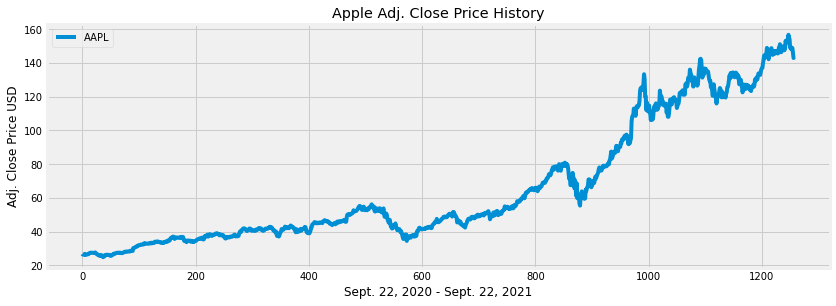

In [ ]:
# Visualize the data
plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL['Adj Close'], label='AAPL')
plt.title('Apple Adj. Close Price History')
plt.xlabel('Sept. 22, 2020 - Sept. 22, 2021')
plt.ylabel('Adj. Close Price USD')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Create the simple moving average with a 30 day window
SMA30 = pd.DataFrame()
SMA30['Adj Close'] = AAPL['Adj Close'].rolling(window=30).mean()
SMA30.head(10)

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [ ]:
# Create simple moving 100-day average
SMA100 = pd.DataFrame()
SMA100['Adj Close'] = AAPL['Adj Close'].rolling(window=100).mean()
SMA100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1253,138.757250
1254,138.902246
1255,139.023232
1256,139.121092


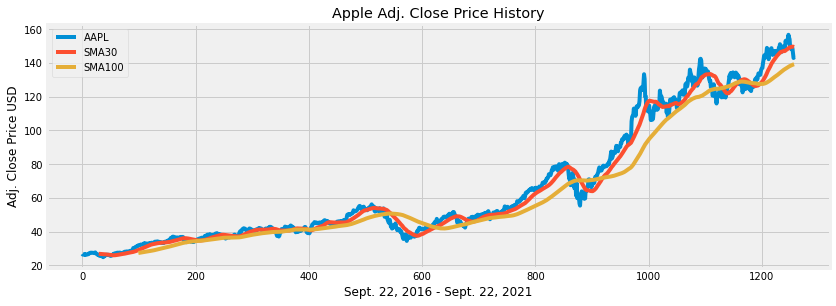

In [ ]:
# Visualize the data with SMA30 and SMA100 plotted
plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL['Adj Close'], label = 'AAPL')
plt.plot(SMA30['Adj Close'], label='SMA30')
plt.plot(SMA100['Adj Close'], label='SMA100')
plt.title('Apple Adj. Close Price History')
plt.xlabel('Sept. 22, 2016 - Sept. 22, 2021')
plt.ylabel('Adj. Close Price USD')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# New data frame to store all the data
data = pd.DataFrame()
data['AAPL'] = AAPL['Adj Close']
data['SMA30'] = SMA30['Adj Close']
data['SMA100'] = SMA100['Adj Close']
data

,AAPL,SMA30,SMA100
0,26.873819,NaN,NaN
1,26.426001,NaN,NaN
2,26.465858,NaN,NaN
3,26.515097,NaN,NaN
4,26.716732,NaN,NaN
...,...,...,...
1253,149.029999,149.619672,138.757250
1254,148.789993,149.688333,138.902246
1255,146.059998,149.662333,139.023232
1256,142.940002,149.555667,139.121092


In [ ]:
# Create a function to return the buy & sell price
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        # Grab the price at the point and append to buy signal
        sigPriceBuy.append(data['AAPL'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['AAPL'][i])
        flag = 0;
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)

  return sigPriceBuy, sigPriceSell


In [ ]:
buy_sell(data)

([nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  31.957303999999997,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan

In [ ]:
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [ ]:
# Show the data
data

,AAPL,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,26.873819,NaN,NaN,NaN,NaN
1,26.426001,NaN,NaN,NaN,NaN
2,26.465858,NaN,NaN,NaN,NaN
3,26.515097,NaN,NaN,NaN,NaN
4,26.716732,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1253,149.029999,149.619672,138.757250,NaN,NaN
1254,148.789993,149.688333,138.902246,NaN,NaN
1255,146.059998,149.662333,139.023232,NaN,NaN
1256,142.940002,149.555667,139.121092,NaN,NaN


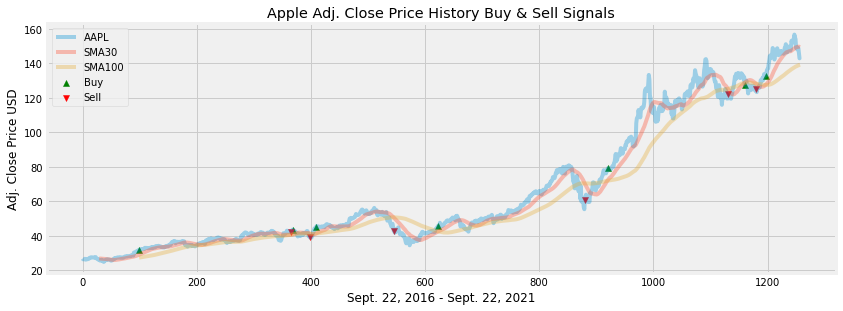

In [ ]:
# Visualize the data and the strategy to buy and sell the stock
plt.figure(figsize=(12.6, 4.6))
plt.plot(data['AAPL'], label = 'AAPL', alpha=0.35)
plt.plot(data['SMA30'], label = 'SMA30', alpha=0.35)
plt.plot(data['SMA100'], label = 'SMA100', alpha=0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('Apple Adj. Close Price History Buy & Sell Signals')
plt.xlabel('Sept. 22, 2016 - Sept. 22, 2021')
plt.ylabel('Adj. Close Price USD')
plt.legend(loc='upper left')
plt.show()